In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
!unzip "archive (2).zip"

Archive:  archive (2).zip
  inflating: Folds5x2_pp.csv         


# Task
Load the "owid-energy.csv" file into a pandas DataFrame and perform an initial data inspection, including displaying the first few rows, checking data types, and looking for missing values.

## Load data

### Subtask:
Load the 'owid-energy.csv' file into a pandas DataFrame.


**Reasoning**:
Load the 'owid-energy.csv' file into a pandas DataFrame named `df` and display the first few rows to confirm successful loading.



In [6]:
df = pd.read_csv('Folds5x2_pp.csv')
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


**Reasoning**:
The subtask instructs to load the 'owid-energy.csv' file into a pandas DataFrame named `df`, which has been successfully completed and confirmed by displaying the first few rows. The next logical step, based on the overall task, is to check the data types of the columns in the DataFrame to understand the nature of the data.



In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


**Reasoning**:
Following the initial data inspection requirements, after loading the data and checking its types, the next step is to examine the missing values within the DataFrame. This will provide insights into data completeness and potential cleaning needs.



In [8]:
print(df.isnull().sum().sort_values(ascending=False))

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64


In [9]:
df.columns.tolist()

['AT', 'V', 'AP', 'RH', 'PE']

In [10]:
X=df.drop(columns=['PE'])
y=df['PE']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
X_train.shape, y_train.shape

((7654, 4), (7654,))

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [30]:
model=Sequential()
model.add(Flatten(input_shape=(4,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,961 (35.00 KB)

 Trainable params: 8,961 (35.00 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True)

In [37]:
history=model.fit(X_train,y_train,epochs=10,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 35.4262 - mae: 4.4860 - val_loss: 22.5546 - val_mae: 3.7883
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24.4356 - mae: 3.7919 - val_loss: 20.5111 - val_mae: 3.6308
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.5176 - mae: 3.7110 - val_loss: 20.6778 - val_mae: 3.6544
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.9735 - mae: 3.6260 - val_loss: 18.8410 - val_mae: 3.4969
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.0897 - mae: 3.5545 - val_loss: 20.8819 - val_mae: 3.6202
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.3111 - mae: 3.5689 - val_loss: 19.0786 - val_mae: 3.5091
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.8207 - mae: 3.5154 - val_loss: 18.8740 - val_mae: 3.5142
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20.2373 - mae: 3.4711 - val_loss: 18.1655 - val_mae: 3.4229
Epoch 9/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 

In [38]:
loss,acc=model.evaluate(X_test,y_test)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.1052 - mae: 3.4655


In [39]:
y_pred=model.predict(X_test)
y_pred

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[433.64584],
       [446.83157],
       [443.01086],
       ...,
       [452.89542],
       [445.22095],
       [433.13992]], dtype=float32)

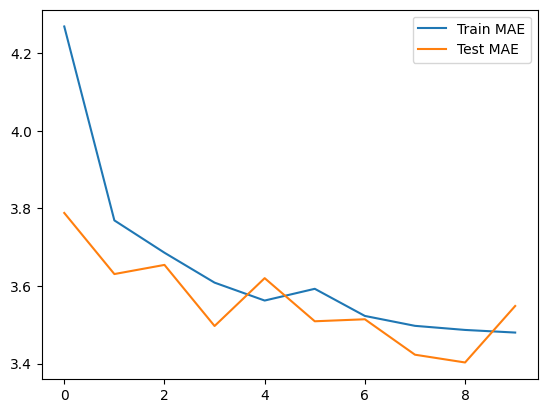

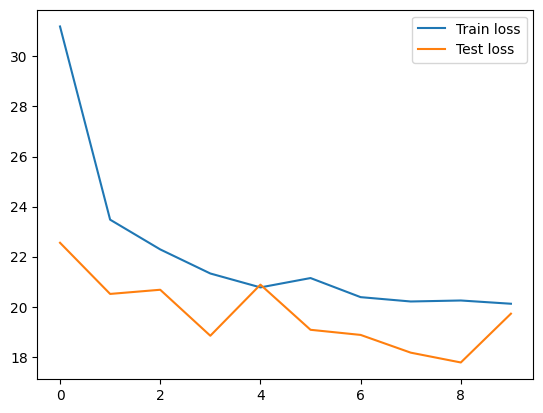

In [40]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'],label='Train MAE')
plt.plot(history.history['val_mae'],label='Test MAE')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='Train loss')
plt.plot(history.history['val_loss'],label='Test loss')
plt.legend()
plt.show()

In [42]:
sample=np.array([X_train[1]]) # Corrected to be a 2D array (1, 4)
sample=scaler.transform(sample)

prediction=model.predict(sample)
print('Prediction:',prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: [[437.31357]]


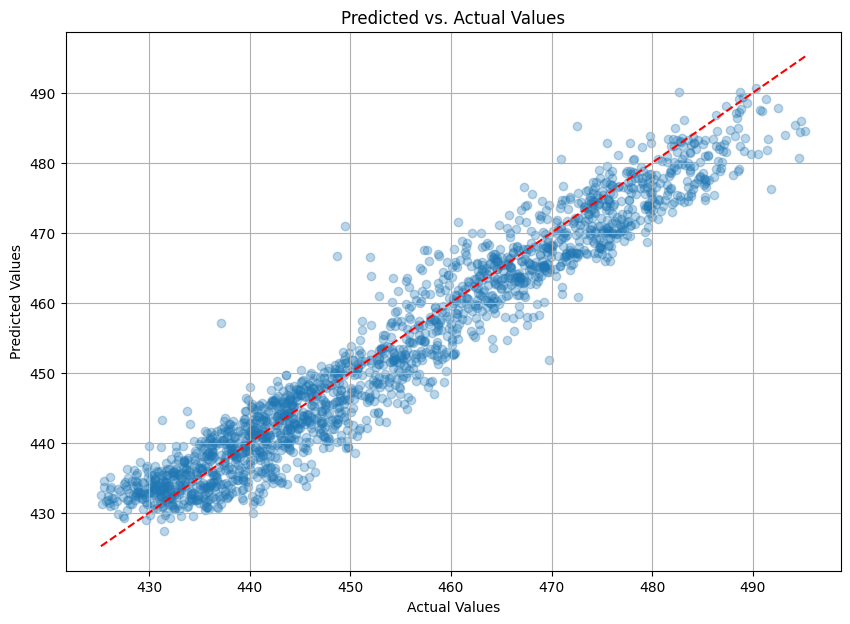

In [44]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # Diagonal line for perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.grid(True)
plt.show()

In [43]:
true_value = y_train[1]
print(f"Predicted value: {prediction[0][0]:.2f}")
print(f"Actual value: {true_value:.2f}")
print(f"Difference: {abs(prediction[0][0] - true_value):.2f}")

Predicted value: 437.31
Actual value: 445.75
Difference: 8.44
